In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import optuna

/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def PCA_analysis(directory, scaler, n_components):
    
    full_paths = glob.glob(os.path.join(directory, 'spins_iter-*.csv'))

    flist = []
    for filename in full_paths:
        df = pd.read_csv(filename, header=None) 
        flist.append(df)

    arraylist = []
    for file in flist:
        array = file.to_numpy()
        flattened_array = array.flatten()
        arraylist.append(flattened_array)
        
    df = pd.DataFrame(arraylist)
 
    scaled = scaler.fit_transform(df)

    pca = sklearn.decomposition.PCA(n_components)
    pca.fit(scaled)

    principal_components = pca.transform(scaled)
    return principal_components

def cluster_and_plot(pca, model=sklearn.cluster.KMeans(n_clusters=2, random_state=42)):
    cluster_labels = model.fit_predict(principal_components)

    pdf = pd.DataFrame(data=principal_components)
    pdf['cluster'] = cluster_labels

    sns.pairplot(pdf, hue='cluster', diag_kind='kde')
    plt.suptitle('Pairplot of Principal Components by Cluster', y=1.05)
    plt.show()

def clusters(pca, model=sklearn.cluster.KMeans(n_clusters=2, random_state=42)):
    cluster_labels = model.fit_predict(pca)

    return cluster_labels

## betaJ 0010

[I 2025-07-08 21:15:13,154] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


[I 2025-07-08 21:15:33,176] Trial 0 finished with value: 0.3322505386281447 and parameters: {'n_components': 2, 'scaler_type': 'MaxAbsScaler'}. Best is trial 0 with value: 0.3322505386281447.
[I 2025-07-08 21:15:52,862] Trial 1 finished with value: 0.18323209856857806 and parameters: {'n_components': 4, 'scaler_type': 'StandardScaler'}. Best is trial 0 with value: 0.3322505386281447.
[I 2025-07-08 21:16:12,489] Trial 2 finished with value: 0.33272748088216253 and parameters: {'n_components': 2, 'scaler_type': 'MaxAbsScaler'}. Best is trial 2 with value: 0.33272748088216253.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.3327
  Params: {'n_components': 2, 'scaler_type': 'MaxAbsScaler'}


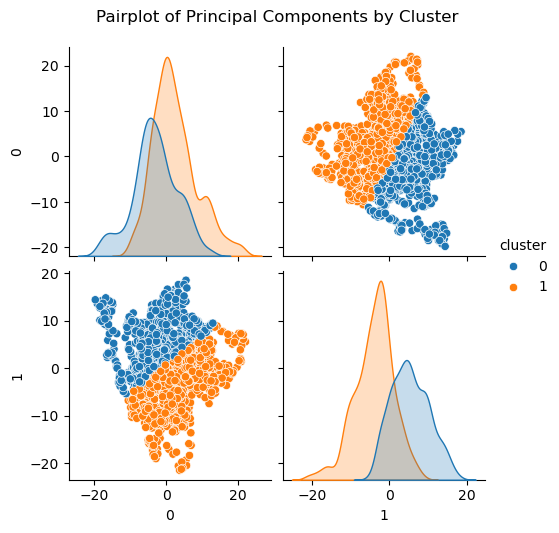

In [3]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-0010_vf-050_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-0010_vf-050_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)

## betaJ 0100

[I 2025-07-08 21:16:33,114] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


[I 2025-07-08 21:16:54,137] Trial 0 finished with value: 0.5274835803533383 and parameters: {'n_components': 2, 'scaler_type': 'RobustScaler'}. Best is trial 0 with value: 0.5274835803533383.
[I 2025-07-08 21:17:12,818] Trial 1 finished with value: 0.4884404922216539 and parameters: {'n_components': 6, 'scaler_type': 'MinMaxScaler'}. Best is trial 0 with value: 0.5274835803533383.
[I 2025-07-08 21:17:31,649] Trial 2 finished with value: 0.45145609158547007 and parameters: {'n_components': 5, 'scaler_type': 'StandardScaler'}. Best is trial 0 with value: 0.5274835803533383.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.5275
  Params: {'n_components': 2, 'scaler_type': 'RobustScaler'}


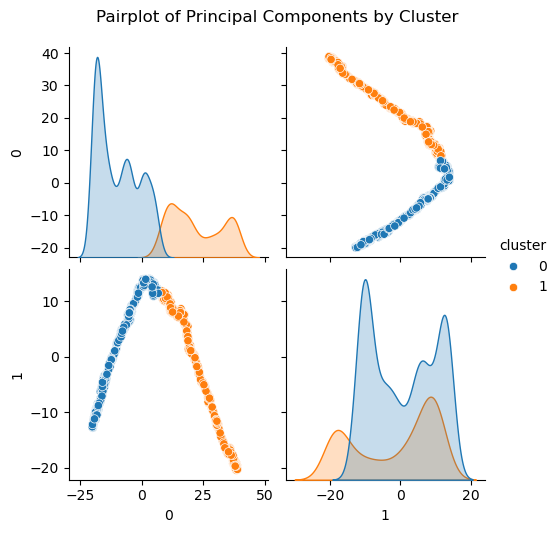

In [4]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-0100_vf-050_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-0100_vf-050_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)

## betaJ 1000

[I 2025-07-08 21:17:52,708] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:193: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:204: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
[I 2025-07-08 21:18:21,501] Trial 0 finished with value: 0.6456071913248566 and parameters: {'n_components': 2, 'scaler_type': 'PowerTransformer'}. Best is trial 0 with value: 0.6456071913248566.
[I 2025-07-08 21:18:41,493] Trial 1 finished with value: 0.6149793794355503 and parameters: {'n_components': 6, 'scaler_type': 'RobustScaler'}. Best is trial 0 with value: 0.6456071913248566.
[I 2025-07-08 21:19:00,014] Trial 2 finished with value: 0.6132549001931902 and parameters: {'n_components': 3, 'scaler_type': 'StandardScaler'}. Best is trial 0 with value: 0.6456071913248566.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.6456
  Params: {'n_components': 2, 'scaler_type': 'PowerTransformer'}


/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:193: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:204: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


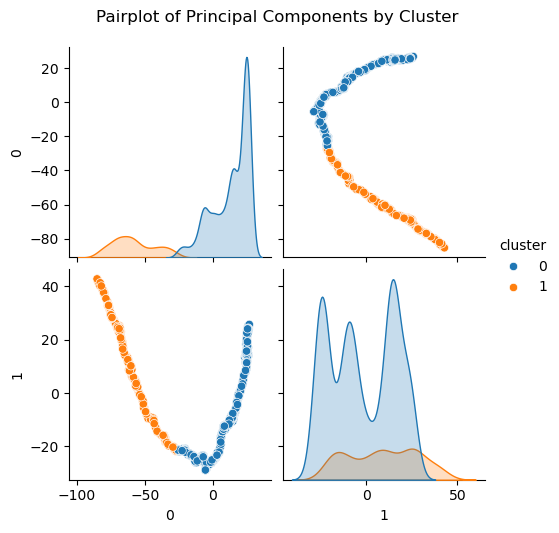

In [5]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-1000_vf-050_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-1000_vf-050_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)

## betaJ 0200 w 025vf

[I 2025-07-08 21:19:29,026] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


[I 2025-07-08 21:19:48,317] Trial 0 finished with value: 0.7048229674409645 and parameters: {'n_components': 2, 'scaler_type': 'MaxAbsScaler'}. Best is trial 0 with value: 0.7048229674409645.
/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:193: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:204: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
[I 2025-07-08 21:20:10,354] Trial 1 finished with value: 0.7755014917015665 and parameters: {'n_components': 2, 'scaler_type': 'PowerTransformer'}. Best is trial 1 with value: 0.7755014917015665.
[I 2025-07-08 21:20:28,905] Trial 2 finished with value: 0.6059410361412085 and parameters: {'n_components': 5, 'scaler_type': 'MinMaxScaler'}. Best is trial 1 with value: 0.7755014917015665.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.7755
  Params: {'n_components': 2, 'scaler_type': 'PowerTransformer'}


/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:193: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/user/miniconda3/envs/Ising/lib/python3.13/site-packages/numpy/_core/_methods.py:204: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


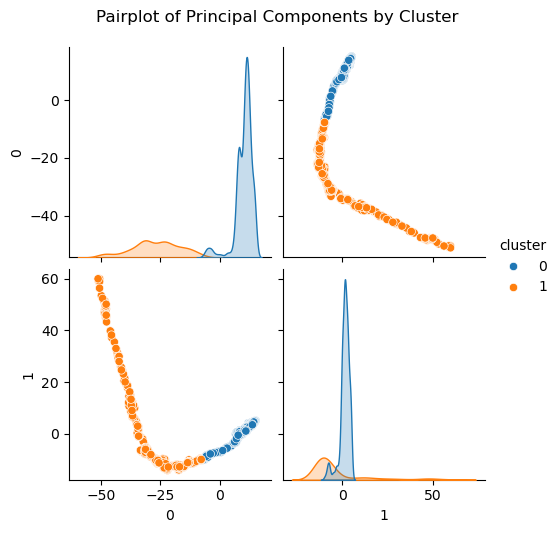

In [6]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-025_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-025_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)

## betaJ 0200 vf 050

[I 2025-07-08 21:20:51,645] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


[I 2025-07-08 21:21:11,228] Trial 0 finished with value: 0.5279281493676392 and parameters: {'n_components': 4, 'scaler_type': 'MinMaxScaler'}. Best is trial 0 with value: 0.5279281493676392.
[I 2025-07-08 21:21:31,754] Trial 1 finished with value: 0.6020430113651712 and parameters: {'n_components': 3, 'scaler_type': 'RobustScaler'}. Best is trial 1 with value: 0.6020430113651712.
[I 2025-07-08 21:21:50,741] Trial 2 finished with value: 0.5590283781462574 and parameters: {'n_components': 3, 'scaler_type': 'MinMaxScaler'}. Best is trial 1 with value: 0.6020430113651712.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.6020
  Params: {'n_components': 3, 'scaler_type': 'RobustScaler'}


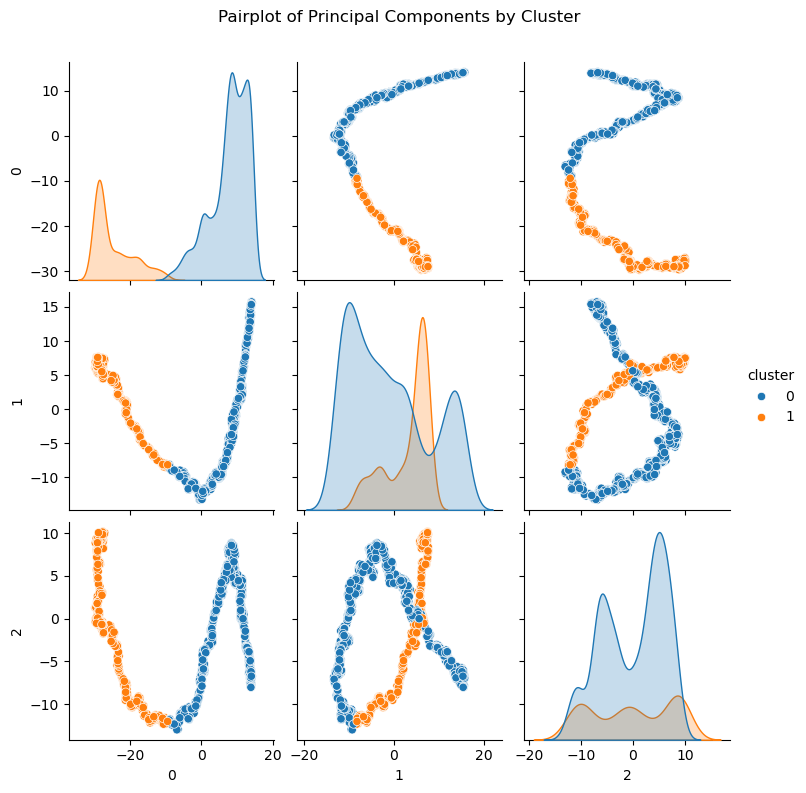

In [7]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-050_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-050_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)

## betaJ 0200 vf 080

[I 2025-07-08 21:22:12,634] A new study created in memory with name: pca_kmeans_optimization


Starting PCA and KMeans hyperparameter optimization


[I 2025-07-08 21:22:32,706] Trial 0 finished with value: 0.4909475642113175 and parameters: {'n_components': 4, 'scaler_type': 'RobustScaler'}. Best is trial 0 with value: 0.4909475642113175.
[I 2025-07-08 21:22:51,211] Trial 1 finished with value: 0.6078304339428255 and parameters: {'n_components': 2, 'scaler_type': 'StandardScaler'}. Best is trial 1 with value: 0.6078304339428255.
[I 2025-07-08 21:23:09,678] Trial 2 finished with value: 0.6078304339324113 and parameters: {'n_components': 2, 'scaler_type': 'StandardScaler'}. Best is trial 1 with value: 0.6078304339428255.


Optimization finished.

PCA and KMeans Optimization Results:
Number of finished trials: 3
Best trial:
  Value (Silhouette Score): 0.6078
  Params: {'n_components': 2, 'scaler_type': 'StandardScaler'}


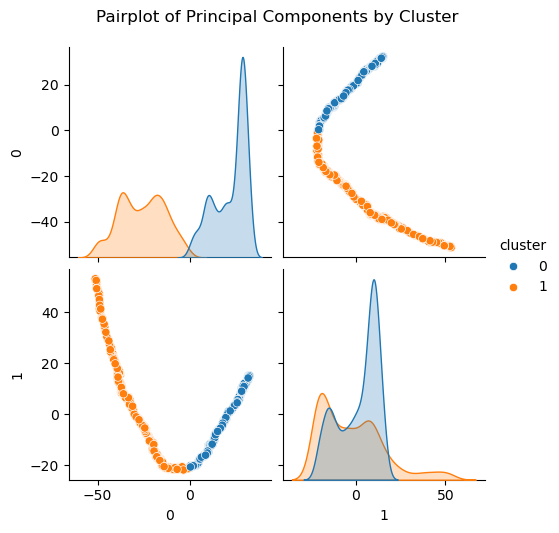

In [8]:
def objective(trial):
    
    directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-080_nrows-100_ncols-100'

    n_components = trial.suggest_int("n_components", 2, 6)
    scaler_type = trial.suggest_categorical('scaler_type', ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer'])

    if scaler_type ==  'StandardScaler':
        scaler_type = sklearn.preprocessing.StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler_type = sklearn.preprocessing.MinMaxScaler()
    elif scaler_type == 'RobustScaler':
        scaler_type = sklearn.preprocessing.RobustScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler_type = sklearn.preprocessing.MaxAbsScaler()
    elif scaler_type == 'PowerTransformer':
        scaler_type = sklearn.preprocessing.PowerTransformer()

    pca = PCA_analysis(directory=directory_path, n_components=n_components, scaler=scaler_type)
    cluster_labels = clusters(pca=pca)

    score = sklearn.metrics.silhouette_score(pca, cluster_labels)

    return score

study = optuna.create_study(direction='maximize', study_name='pca_kmeans_optimization')

print("Starting PCA and KMeans hyperparameter optimization")
study.optimize(objective, n_trials=3)
print("Optimization finished.")

print("\nPCA and KMeans Optimization Results:")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
print(f"  Value (Silhouette Score): {study.best_value:.4f}")
print(f"  Params: {study.best_params}")

best_n_components = study.best_params['n_components']
scaler_type = study.best_params['scaler_type']

if scaler_type ==  'StandardScaler':
    scaler_type = sklearn.preprocessing.StandardScaler()
elif scaler_type == 'MinMaxScaler':
    scaler_type = sklearn.preprocessing.MinMaxScaler()
elif scaler_type == 'RobustScaler':
    scaler_type = sklearn.preprocessing.RobustScaler()
elif scaler_type == 'MaxAbsScaler':
    scaler_type = sklearn.preprocessing.MaxAbsScaler()
elif scaler_type == 'PowerTransformer':
    scaler_type = sklearn.preprocessing.PowerTransformer()

directory_path = '/home/user/IsingData/Data/betaJ-0200_vf-080_nrows-100_ncols-100'

principal_components = PCA_analysis(directory=directory_path, n_components=best_n_components, scaler=scaler_type)
cluster_and_plot(pca=principal_components)